In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#df = pd.read_feather('/kaggle/input/nos-news-articles-2015-2024oct/NOS_NL_articles_2015_mar_2025.feather') OLD

#read dataset / latest version: sept 2025 
df = pd.read_feather("C:\\Users\\Max van der Slot\\Downloads\\NOS_NL_articles_2015_jul_2025.feather")

# Ensure 'published_time' column is in datetime format
df['published_time'] = pd.to_datetime(df['published_time'])

# Display last three rows
df.tail(3)

,channel,url,type,title,keywords,section,description,published_time,modified_time,image,content
296931,nos,https://nos.nl/artikel/2577138,article,Meer dan 70 verwaarloosde honden weggehaald ui...,"verwaarloosde dieren, Oosterwolde",Regionaal nieuws,De honden zijn naar een opvanglocatie gebracht...,2025-07-31 22:43:35,2025-07-31 22:43:35,https://cdn.nos.nl/image/2025/07/31/1255340/10...,<h1>Meer dan 70 verwaarloosde honden weggehaal...
296932,nos,https://nos.nl/artikel/2577139,article,Vitesse is geen profclub meer: 'Niemand kan ge...,"Vitesse, voetbal",Voetbal,Vitesse is door de uitspraak van de beroepscom...,2025-07-31 22:45:18,2025-07-31 23:19:15,https://cdn.nos.nl/image/2025/08/01/1255453/10...,<h1>Vitesse is geen profclub meer: 'Niemand ka...
296933,nos,https://nos.nl/artikel/2577141,article,Vijf van de zes Nederlandse beachvolleybalkopp...,"EK beachvolleybal, beachvolleybal",Beachvolleybal,Vijf van de zes Nederlandse beachvolleybalkopp...,2025-07-31 23:14:19,2025-07-31 23:14:19,https://cdn.nos.nl/image/2025/07/31/1255347/10...,<h1>Vijf van de zes Nederlandse beachvolleybal...


In [13]:
# Count the number of rows
total_rows = len(df)

# Count the number of rows after filtering on nos-channel (and remove nieuwsuur-articles)
df = df[(df['channel'] == 'nos')]

total_rows_filtered = len(df)

print("Total number of rows:", total_rows, "\nFiltered ('nos' channel): ", total_rows_filtered)

Total number of rows: 296934 
Filtered ('nos' channel):  287018


In [14]:
count_article = df[df['type'] == 'article'].shape[0]
count_liveblog = df[df['type'] == 'liveblog'].shape[0]

print("number of articles: ", count_article)
print("number of liveblogs: ", count_liveblog)

number of articles:  282275
number of liveblogs:  4743


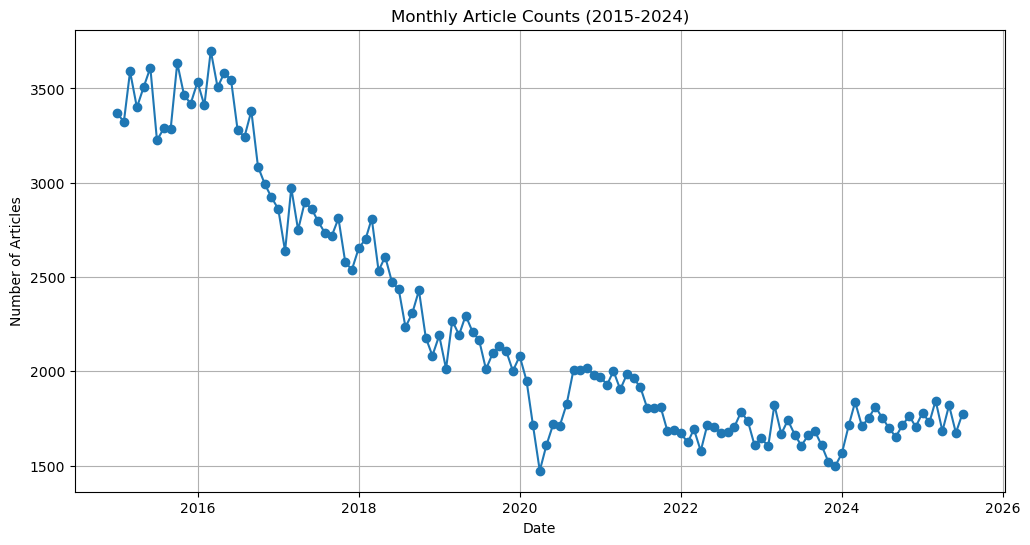

In [15]:
# Extract the year and month from 'published_time' as a new column in YYYY-MM format
df['year_month'] = df['published_time'].dt.to_period('M')

# Count the number of articles per month
monthly_counts = df.groupby('year_month').size()

# Convert to DataFrame for plotting
monthly_counts_df = monthly_counts.reset_index(name='article_count')
monthly_counts_df['year_month'] = monthly_counts_df['year_month'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df['year_month'], monthly_counts_df['article_count'], marker='o')
plt.title("Monthly Article Counts (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

In [16]:
# Define the specific timestamp to filter
specific_time = "2024-10-12 12:06:43"

# Filter the dataframe for the exact published_time and select only the desired columns
row_specific_time = df[df['published_time'] == specific_time][['content']]

# Print the selected columns in a tabular format
print(row_specific_time.to_string(index=False))

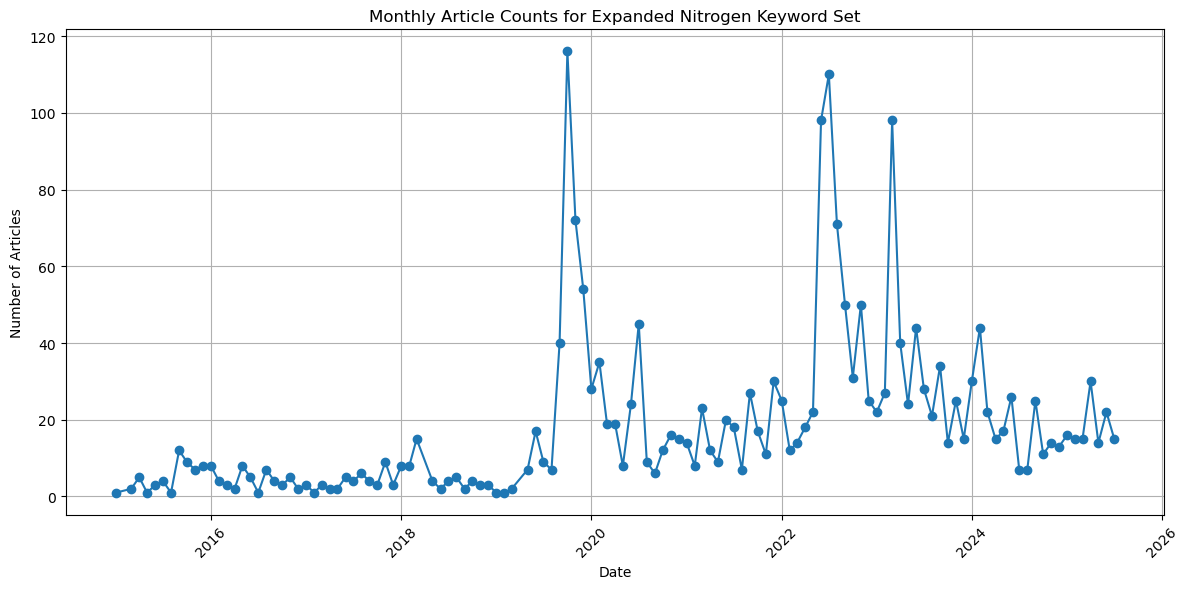

Total matched articles: 2242


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

search_words = [
    "stikstof",
    "stikstofcrisis",
    "stikstofbeleid",
    "stikstofprobleem",
    "boerenprotest",
]

# Maak 1 regex-patroon van alle keywords (OR)
pattern = "|".join(search_words)

# Kolommen waarin je wil zoeken
cols = ["title", "keywords", "section", "description", "content"]

# Filter: match als 1 van de keywords voorkomt in 1 van de kolommen
mask = False
for c in cols:
    mask = mask | df[c].astype(str).str.contains(pattern, case=False, na=False, regex=True)

df_filtered = df[mask].copy()

# Monthly grouping
df_filtered["published_time"] = pd.to_datetime(df_filtered["published_time"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["published_time"])
df_filtered["year_month"] = df_filtered["published_time"].dt.to_period("M")

monthly_counts = df_filtered.groupby("year_month").size()
monthly_counts_df = monthly_counts.reset_index(name="article_count")
monthly_counts_df["year_month"] = monthly_counts_df["year_month"].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df["year_month"], monthly_counts_df["article_count"], marker="o", linestyle="-")
plt.title("Monthly Article Counts for Expanded Nitrogen Keyword Set")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total matched articles:", len(df_filtered))


In [29]:
import pandas as pd

# 1) Read the Google Trends export (first row is usually metadata)
df_trends = pd.read_csv(
    r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv",
    skiprows=1
)

# 2) Kijk even hoeveel kolommen je hebt
print("Columns found:", list(df_trends.columns))

# 3) Neem de eerste kolom als datum, en de eerste niet-datum kolom als trends
date_col = df_trends.columns[0]

# Soms heet die tweede kolom bv. "stikstof: (Netherlands)"
value_col = df_trends.columns[1]

# 4) Maak een schone trends-df met precies 2 kolommen
df_trends = df_trends[[date_col, value_col]].copy()
df_trends = df_trends.rename(columns={date_col: "date", value_col: "Google_Trends_index"})

# 5) Datetime + opschonen
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

# 6) (optioneel) Maak index numeric (soms staat er "<1")
df_trends["Google_Trends_index"] = (
    df_trends["Google_Trends_index"]
    .astype(str)
    .str.replace("<1", "0", regex=False)
)
df_trends["Google_Trends_index"] = pd.to_numeric(df_trends["Google_Trends_index"], errors="coerce")

display(df_trends.head())
display(df_trends.tail())


Columns found: ['Maand', 'stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'stikstofbeleid: (Nederland)', 'stikstofprobleem: (Nederland)', 'boerenprotest: (Nederland)']


,date,Google_Trends_index
0,2015-01-01,6
1,2015-02-01,6
2,2015-03-01,7
3,2015-04-01,7
4,2015-05-01,5


,date,Google_Trends_index
124,2025-05-01,12
125,2025-06-01,13
126,2025-07-01,10
127,2025-08-01,9
128,2025-09-01,11


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Gebruik je gefilterde NOS data
df_nos = df_filtered.copy()

# Datetime check
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

# Maak maand-periode
df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

# Tel artikelen per maand
nos_monthly = (
    df_nos
    .groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

# Maak timestamp voor plotting / merge
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()

display(nos_monthly.head())
display(nos_monthly.tail())


,year_month,NOS_article_count,date
0,2015-01,638,2015-01-01
1,2015-02,634,2015-02-01
2,2015-03,683,2015-03-01
3,2015-04,638,2015-04-01
4,2015-05,593,2015-05-01


,year_month,NOS_article_count,date
122,2025-03,535,2025-03-01
123,2025-04,491,2025-04-01
124,2025-05,518,2025-05-01
125,2025-06,428,2025-06-01
126,2025-07,539,2025-07-01


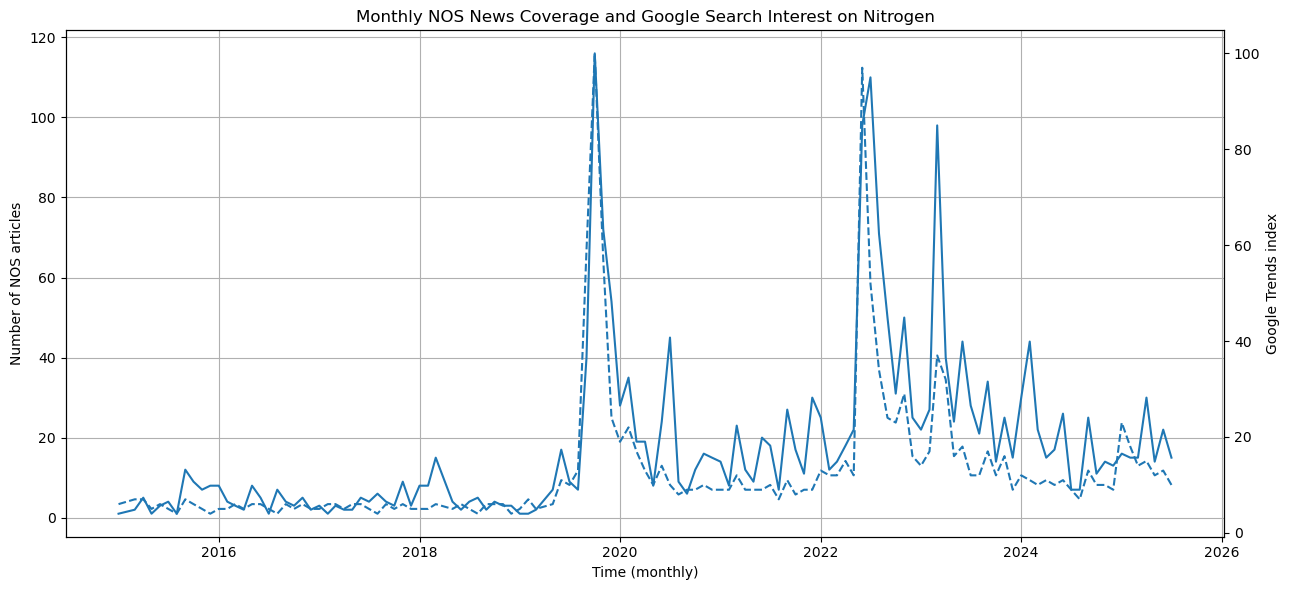

Date range: 2015-01-01 00:00:00 to 2025-07-01 00:00:00
Number of months: 124


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) NOS artikelen -> maandelijkse telling
# -----------------------------
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos
    .groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()

# -----------------------------
# 2) Google Trends (al maandelijks)
# -----------------------------
df_gt = df_trends.copy()
df_gt["date"] = pd.to_datetime(df_gt["date"], errors="coerce")
df_gt = df_gt.dropna(subset=["date"])

# -----------------------------
# 3) Combineer op maand
# -----------------------------
combined = pd.merge(
    nos_monthly[["date", "NOS_article_count"]],
    df_gt[["date", "Google_Trends_index"]],
    on="date",
    how="inner"
).sort_values("date")

# -----------------------------
# 4) Gecombineerde time-series plot (2 y-assen)
# -----------------------------
fig, ax1 = plt.subplots(figsize=(13, 6))

# Linker y-as: NOS
ax1.plot(
    combined["date"],
    combined["NOS_article_count"],
    label="NOS articles"
)
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Rechter y-as: Google Trends
ax2 = ax1.twinx()
ax2.plot(
    combined["date"],
    combined["Google_Trends_index"],
    label="Google Trends",
    linestyle="--"
)
ax2.set_ylabel("Google Trends index")

plt.title("Monthly NOS News Coverage and Google Search Interest on Nitrogen")
fig.tight_layout()
plt.show()

# Sanity check
print("Date range:", combined["date"].min(), "to", combined["date"].max())
print("Number of months:", len(combined))


Trends term columns used: ['stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'stikstofbeleid: (Nederland)', 'stikstofprobleem: (Nederland)', 'boerenprotest: (Nederland)']
Date range: 2015-01-01 00:00:00 to 2025-07-01 00:00:00
Number of months: 124


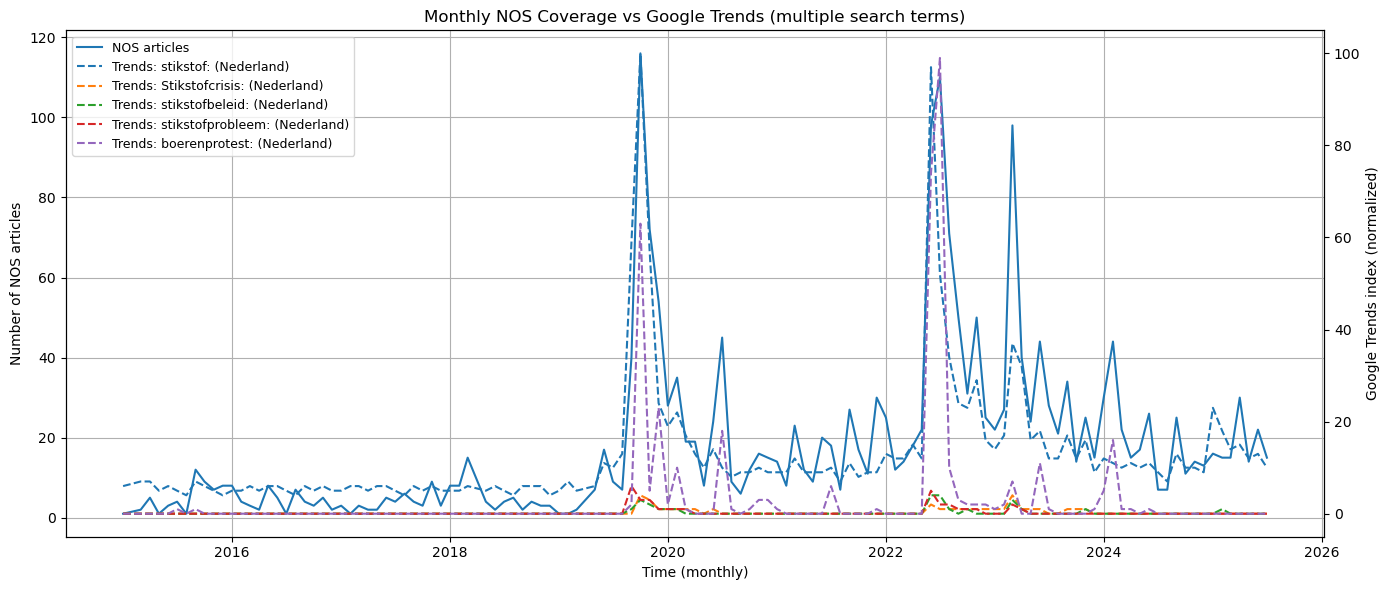

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 0) INPUT PATHS (pas deze paden aan)
# =========================================================
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"

# df_filtered moet al bestaan (jullie gefilterde NOS-artikelen)
# en moet een kolom 'published_time' hebben (datetime of convertible).

# =========================================================
# 1) NOS -> maandelijkse telling
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly[["date", "NOS_article_count"]].sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen inladen + opschonen
#    (werkt voor exports met meerdere kolommen)
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)

# Eerste kolom is datum (meestal "Week" of "Month")
date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])  # alle zoektermen/series

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

# '<1' -> 0 en naar numeric
for c in term_cols:
    df_trends[c] = (
        df_trends[c].astype(str)
        .str.replace("<1", "0", regex=False)
    )
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

# (optioneel) verwijder kolommen die helemaal leeg zijn
term_cols = [c for c in term_cols if df_trends[c].notna().any()]

# =========================================================
# 3) Merge NOS + Trends op maand (date)
# =========================================================
combined = pd.merge(
    nos_monthly,
    df_trends[["date"] + term_cols],
    on="date",
    how="inner"
).sort_values("date")

print("Trends term columns used:", term_cols)
print("Date range:", combined["date"].min(), "to", combined["date"].max())
print("Number of months:", len(combined))

# =========================================================
# 4) Plot: NOS (linker y-as) + meerdere Trends lijnen (rechter y-as)
# =========================================================
fig, ax1 = plt.subplots(figsize=(14, 6))

# NOS on left axis
ax1.plot(combined["date"], combined["NOS_article_count"], label="NOS articles")
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Trends on right axis
ax2 = ax1.twinx()
for c in term_cols:
    ax2.plot(combined["date"], combined[c], linestyle="--", label=f"Trends: {c}")
ax2.set_ylabel("Google Trends index (normalized)")

plt.title("Monthly NOS Coverage vs Google Trends (multiple search terms)")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=9)

fig.tight_layout()
plt.show()


Trends term columns used:
 - stikstof: (Nederland)
 - Stikstofcrisis: (Nederland)
 - stikstofbeleid: (Nederland)
 - stikstofprobleem: (Nederland)
 - boerenprotest: (Nederland)


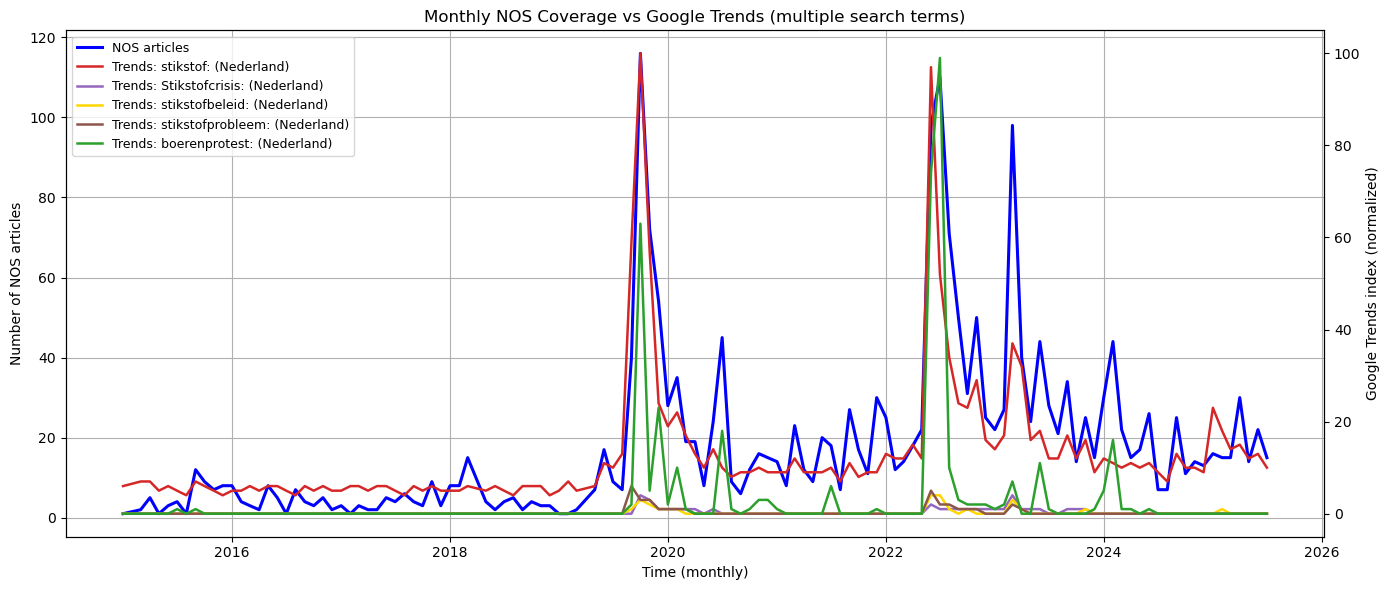

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 0) INPUT PATHS
# =========================================================
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"

# =========================================================
# 1) NOS -> maandelijkse telling
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly[["date", "NOS_article_count"]].sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen inladen + opschonen
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)

date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

for c in term_cols:
    df_trends[c] = df_trends[c].astype(str).str.replace("<1", "0", regex=False)
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

term_cols = [c for c in term_cols if df_trends[c].notna().any()]

# =========================================================
# 3) Merge NOS + Trends op maand (date)
# =========================================================
combined = pd.merge(
    nos_monthly,
    df_trends[["date"] + term_cols],
    on="date",
    how="inner"
).sort_values("date")

print("Trends term columns used:")
for c in term_cols:
    print(" -", c)

# =========================================================
# 4) Plot: juiste kleuren + normale lijnen
# =========================================================
def pick_color(colname: str):
    n = colname.lower()
    if "stikstofcrisis" in n:
        return "tab:purple"
    if "stikstofbeleid" in n:
        return "gold"          # <- tab:yellow bestaat niet
    if "stikstofprobleem" in n:
        return "tab:brown"
    if "boerenprotest" in n:
        return "tab:green"
    if "stikstof" in n:
        return "tab:red"
    return None  # default matplotlib kleur

fig, ax1 = plt.subplots(figsize=(14, 6))

# NOS lijn
ax1.plot(
    combined["date"],
    combined["NOS_article_count"],
    color="blue",
    linewidth=2.2,
    label="NOS articles"
)
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Trends lijnen
ax2 = ax1.twinx()
for c in term_cols:
    ax2.plot(
        combined["date"],
        combined[c],
        linestyle="-",
        linewidth=1.8,
        color=pick_color(c),
        label=f"Trends: {c}"
    )

ax2.set_ylabel("Google Trends index (normalized)")
plt.title("Monthly NOS Coverage vs Google Trends (multiple search terms)")

# Legenda combineren
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=9)

fig.tight_layout()
plt.show()


In [ ]:
display(combined)



,date,NOS_article_count,stikstof: (Nederland),Stikstofcrisis: (Nederland),stikstofbeleid: (Nederland),stikstofprobleem: (Nederland),boerenprotest: (Nederland)
0,2015-01-01,1,6,0,0,0,0
1,2015-03-01,2,7,0,0,0,0
2,2015-04-01,5,7,0,0,0,0
3,2015-05-01,1,5,0,0,0,0
4,2015-06-01,3,6,0,0,0,0
...,...,...,...,...,...,...,...
119,2025-03-01,15,14,0,0,0,0
120,2025-04-01,30,15,0,0,0,0
121,2025-05-01,14,12,0,0,0,0
122,2025-06-01,22,13,0,0,0,0


In [44]:
import pandas as pd
from functools import reduce

# === kies je 5 keywords ===
keywords = ["stikstof", "stikstofcrisis", "stikstofbeleid", "stikstofprobleem", "boerenprotest"]

# === start van de NOS dataset (alle NOS artikelen) ===
df_kw = df.copy()
df_kw["published_time"] = pd.to_datetime(df_kw["published_time"], errors="coerce")
df_kw = df_kw.dropna(subset=["published_time"])
df_kw["year_month"] = df_kw["published_time"].dt.to_period("M")

text_cols = ["title", "keywords", "section", "description", "content"]

# === tel per maand per keyword ===
tables = []
for kw in keywords:
    mask = False
    for col in text_cols:
        mask = mask | df_kw[col].astype(str).str.contains(kw, case=False, na=False)
    monthly = df_kw[mask].groupby("year_month").size().reset_index(name=kw)
    tables.append(monthly)

# === merge alles tot 1 tabel ===
keyword_monthly_counts = reduce(
    lambda left, right: pd.merge(left, right, on="year_month", how="outer"),
    tables
).fillna(0)

# === maak datumkolom ===
keyword_monthly_counts["date"] = keyword_monthly_counts["year_month"].dt.to_timestamp()

# === maak TOTAAL-kolom ===
keyword_monthly_counts["total_keywords"] = keyword_monthly_counts[keywords].sum(axis=1)

# netjes sorteren + ints
keyword_monthly_counts = keyword_monthly_counts.sort_values("date")
for kw in keywords + ["total_keywords"]:
    keyword_monthly_counts[kw] = keyword_monthly_counts[kw].astype(int)

display(keyword_monthly_counts)


,year_month,stikstof,stikstofcrisis,stikstofbeleid,stikstofprobleem,boerenprotest,date,total_keywords
0,2015-01,1,0,0,0,0,2015-01-01,1
1,2015-03,2,0,0,0,0,2015-03-01,2
2,2015-04,5,0,0,0,0,2015-04-01,5
3,2015-05,1,0,0,0,0,2015-05-01,1
4,2015-06,3,0,0,0,0,2015-06-01,3
...,...,...,...,...,...,...,...,...
119,2025-03,15,3,2,4,1,2025-03-01,25
120,2025-04,30,5,3,7,0,2025-04-01,45
121,2025-05,13,2,3,2,1,2025-05-01,21
122,2025-06,19,4,6,1,5,2025-06-01,35


In [45]:
import pandas as pd
from functools import reduce

# === kies je 5 keywords ===
keywords = ["stikstof", "stikstofcrisis", "stikstofbeleid", "stikstofprobleem", "boerenprotest"]

# === start van de NOS dataset (alle NOS artikelen) ===
df_kw = df.copy()
df_kw["published_time"] = pd.to_datetime(df_kw["published_time"], errors="coerce")
df_kw = df_kw.dropna(subset=["published_time"])
df_kw["year_month"] = df_kw["published_time"].dt.to_period("M")

text_cols = ["title", "keywords", "section", "description", "content"]

# === tel per maand per keyword ===
tables = []
for kw in keywords:
    mask = False
    for col in text_cols:
        mask = mask | df_kw[col].astype(str).str.contains(kw, case=False, na=False)
    monthly = df_kw[mask].groupby("year_month").size().reset_index(name=kw)
    tables.append(monthly)

# === merge alles tot 1 tabel ===
keyword_monthly_counts = reduce(
    lambda left, right: pd.merge(left, right, on="year_month", how="outer"),
    tables
).fillna(0)

# === maak datumkolom + total ===
keyword_monthly_counts["date"] = keyword_monthly_counts["year_month"].dt.to_timestamp()
keyword_monthly_counts["total_keywords"] = keyword_monthly_counts[keywords].sum(axis=1)

# === sorteren + ints ===
keyword_monthly_counts = keyword_monthly_counts.sort_values("date")
for col in keywords + ["total_keywords"]:
    keyword_monthly_counts[col] = keyword_monthly_counts[col].astype(int)

# === filter: alleen 2019 ===
keyword_monthly_counts_2019 = keyword_monthly_counts[
    (keyword_monthly_counts["date"] >= "2019-01-01") &
    (keyword_monthly_counts["date"] <= "2019-12-31")
]

display(keyword_monthly_counts_2019)


,year_month,stikstof,stikstofcrisis,stikstofbeleid,stikstofprobleem,boerenprotest,date,total_keywords
46,2019-01,1,0,0,0,0,2019-01-01,1
47,2019-02,1,0,0,0,0,2019-02-01,1
48,2019-03,2,0,0,0,0,2019-03-01,2
49,2019-05,7,0,0,0,0,2019-05-01,7
50,2019-06,17,1,3,0,0,2019-06-01,21
51,2019-07,8,0,1,1,1,2019-07-01,11
52,2019-08,7,0,0,0,0,2019-08-01,7
53,2019-09,40,2,4,10,1,2019-09-01,57
54,2019-10,101,30,15,12,51,2019-10-01,209
55,2019-11,67,25,9,9,15,2019-11-01,125


In [47]:
import pandas as pd
from functools import reduce

# === keywords ===
keywords = ["stikstof", "stikstofcrisis", "stikstofbeleid", "stikstofprobleem", "boerenprotest"]
text_cols = ["title", "keywords", "section", "description", "content"]

# === start van de NOS dataset ===
df_kw = df.copy()
df_kw["published_time"] = pd.to_datetime(df_kw["published_time"], errors="coerce")
df_kw = df_kw.dropna(subset=["published_time"])
df_kw["year_month"] = df_kw["published_time"].dt.to_period("M")

# === per keyword counts (overlap toegestaan) ===
tables = []
for kw in keywords:
    mask_kw = False
    for col in text_cols:
        mask_kw = mask_kw | df_kw[col].astype(str).str.contains(kw, case=False, na=False)
    monthly = df_kw[mask_kw].groupby("year_month").size().reset_index(name=kw)
    tables.append(monthly)

keyword_monthly = reduce(
    lambda left, right: pd.merge(left, right, on="year_month", how="outer"),
    tables
).fillna(0)

# === unique articles (OR, geen overlap) ===
pattern_any = "|".join(keywords)
mask_any = False
for col in text_cols:
    mask_any = mask_any | df_kw[col].astype(str).str.contains(pattern_any, case=False, na=False)

unique_monthly = (
    df_kw[mask_any]
    .groupby("year_month")
    .size()
    .reset_index(name="unique_articles")
)

# === combine + totals ===
out = pd.merge(keyword_monthly, unique_monthly, on="year_month", how="outer").fillna(0)
out["date"] = out["year_month"].dt.to_timestamp()
out["total_keywords"] = out[keywords].sum(axis=1)

# ints + sort
out = out.sort_values("date")
for c in keywords + ["unique_articles", "total_keywords"]:
    out[c] = out[c].astype(int)

# === FILTER: alleen heel 2019 ===
out_2019 = out[
    (out["date"] >= "2019-01-01") &
    (out["date"] <= "2019-12-31")
]

display(out_2019)


,year_month,stikstof,stikstofcrisis,stikstofbeleid,stikstofprobleem,boerenprotest,unique_articles,date,total_keywords
46,2019-01,1,0,0,0,0,1,2019-01-01,1
47,2019-02,1,0,0,0,0,1,2019-02-01,1
48,2019-03,2,0,0,0,0,2,2019-03-01,2
49,2019-05,7,0,0,0,0,7,2019-05-01,7
50,2019-06,17,1,3,0,0,17,2019-06-01,21
51,2019-07,8,0,1,1,1,9,2019-07-01,11
52,2019-08,7,0,0,0,0,7,2019-08-01,7
53,2019-09,40,2,4,10,1,40,2019-09-01,57
54,2019-10,101,30,15,12,51,116,2019-10-01,209
55,2019-11,67,25,9,9,15,72,2019-11-01,125


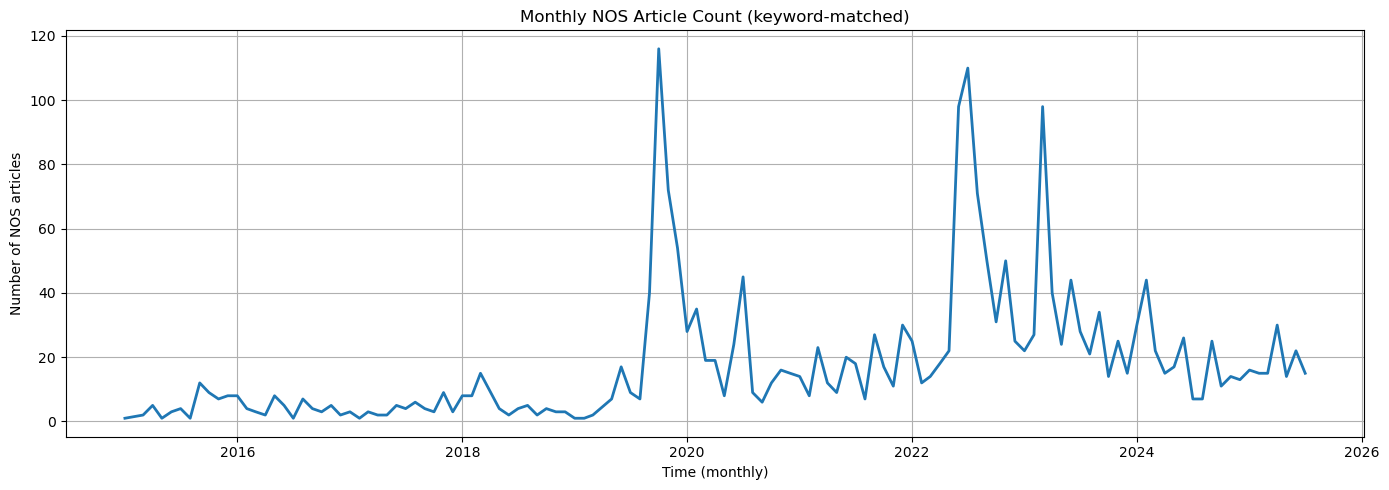

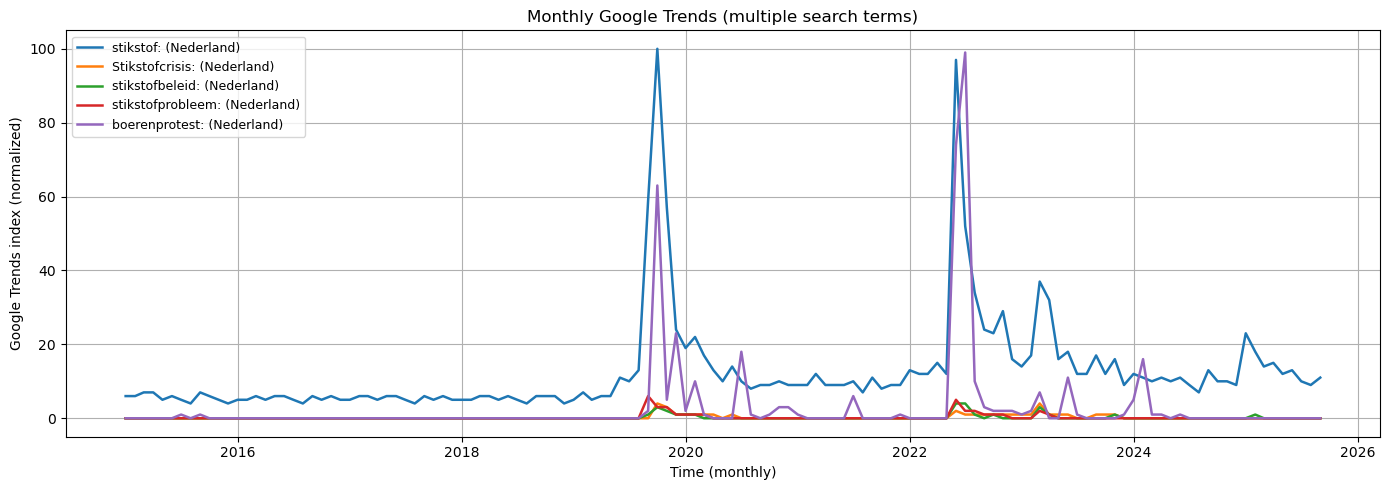

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== INPUTS ======
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"
# df_filtered moet bestaan (NOS artikelen gefilterd op keywords), met kolom 'published_time'

# =========================================================
# 1) NOS -> maandelijkse telling (1 lijn)
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly.sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen (meerdere lijnen)
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)
date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

for c in term_cols:
    df_trends[c] = df_trends[c].astype(str).str.replace("<1", "0", regex=False)
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

term_cols = [c for c in term_cols if df_trends[c].notna().any()]
df_trends = df_trends[["date"] + term_cols].sort_values("date")

# =========================================================
# 3) Plot 1: NOS articles (apart)
# =========================================================
plt.figure(figsize=(14, 5))
plt.plot(nos_monthly["date"], nos_monthly["NOS_article_count"], linewidth=2)
plt.title("Monthly NOS Article Count (keyword-matched)")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of NOS articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Plot 2: Google Trends (alle termen apart)
# =========================================================
plt.figure(figsize=(14, 5))
for c in term_cols:
    plt.plot(df_trends["date"], df_trends[c], linewidth=1.8, label=c)

plt.title("Monthly Google Trends (multiple search terms)")
plt.xlabel("Time (monthly)")
plt.ylabel("Google Trends index (normalized)")
plt.grid(True)
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()

# (optioneel) tabellen laten zien
# display(nos_monthly.head())
# display(df_trends.head())
